In [2]:
from tqdm import tqdm
import regex as re
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd

In [19]:
df=pd.read_csv("/home/maximilian/Desktop/metric_results.csv")

In [24]:
grouped_copycat_df=df[df["metric"]=="our"].groupby(["baseline", "experiment"]).agg(
    velocity_mean_agg=("velocity_mean", "mean"),
    velocity_std_agg=("velocity_std", "mean"),
    accel_mean_agg=("accel_mean", "mean"),
    accel_std_agg=("accel_std", "mean"),
    length_mean=("length", "mean"),
    length_std=("length", "std"),

)

In [25]:
grouped_copycat_df

velocity_mean_agg  \
baseline experiment                                                              
arp      arp_bev-0_detectboxes-0_speed-0_prevnum-0_backb...                NaN   
         arp_bev-0_detectboxes-0_speed-0_prevnum-0_backb...                NaN   
         arp_bev-1_detectboxes-1_speed-0_prevnum-0_backb...           1.038393   
bcoh     bcoh_bev-0_detectboxes-0_speed-0_prevnum-0_back...                NaN   
         bcoh_bev-0_detectboxes-0_speed-0_prevnum-0_back...                NaN   
         bcoh_bev-1_detectboxes-1_speed-0_prevnum-0_back...           0.950511   
bcso     bcso_bev-0_detectboxes-0_speed-0_prevnum-0_back...                NaN   
         bcso_bev-0_detectboxes-0_speed-0_prevnum-0_back...                NaN   
         bcso_bev-0_detectboxes-0_speed-0_prevnum-0_back...                NaN   
         bcso_bev-0_detectboxes-0_speed-0_prevnum-0_back...                NaN   
         bcso_bev-1_detectboxes-1_speed-0_prevnum-0_back...           0.922556   
         bcso_bev-1_detectboxes-1_speed-0_prevnum-0_back...           1.018731   

                                                             velocity_std_agg  \
baseline experiment                                                             
arp      arp_bev-0_detectboxes-0_speed-0_prevnum-0_backb...               NaN   
         arp_bev-0_detectboxes-0_speed-0_prevnum-0_backb...               NaN   
         arp_bev-1_detectboxes-1_speed-0_prevnum-0_backb...          1.000850   
bcoh     bcoh_bev-0_detectboxes-0_speed-0_prevnum-0_back...               NaN   
         bcoh_bev-0_detectboxes-0_speed-0_prevnum-0_back...               NaN   
         bcoh_bev-1_detectboxes-1_speed-0_prevnum-0_back...          1.000686   
bcso     bcso_bev-0_detectboxes-0_speed-0_prevnum-0_back...               NaN   
         bcso_bev-0_detectboxes-0_speed-0_prevnum-0_back...               NaN   
         bcso_bev-0_detectboxes-0_speed-0_prevnum-0_back...               NaN   
         bcso_bev-0_detectboxes-0_speed-0_prevnum-0_back...               NaN   
         bcso_bev-1_detectboxes-1_speed-0_prevnum-0_back...          0.913705   
         bcso_bev-1_detectboxes-1_speed-0_prevnum-0_back...          0.981486   

                                                             accel_mean_agg  \
baseline experiment                                                           
arp      arp_bev-0_detectboxes-0_speed-0_prevnum-0_backb...             NaN   
         arp_bev-0_detectboxes-0_speed-0_prevnum-0_backb...             NaN   
         arp_bev-1_detectboxes-1_speed-0_prevnum-0_backb...        0.922077   
bcoh     bcoh_bev-0_detectboxes-0_speed-0_prevnum-0_back...             NaN   
         bcoh_bev-0_detectboxes-0_speed-0_prevnum-0_back...             NaN   
         bcoh_bev-1_detectboxes-1_speed-0_prevnum-0_back...        0.479958   
bcso     bcso_bev-0_detectboxes-0_speed-0_prevnum-0_back...             NaN   
         bcso_bev-0_detectboxes-0_speed-0_prevnum-0_back...             NaN   
         bcso_bev-0_detectboxes-0_speed-0_prevnum-0_back...             NaN   
         bcso_bev-0_detectboxes-0_speed-0_prevnum-0_back...             NaN   
         bcso_bev-1_detectboxes-1_speed-0_prevnum-0_back...        0.912125   
         bcso_bev-1_detectboxes-1_speed-0_prevnum-0_back...        0.905975   

                                                             accel_std_agg  \
baseline experiment                                                          
arp      arp_bev-0_detectboxes-0_speed-0_prevnum-0_backb...            NaN   
         arp_bev-0_detectboxes-0_speed-0_prevnum-0_backb...            NaN   
         arp_bev-1_detectboxes-1_speed-0_prevnum-0_backb...       1.519150   
bcoh     bcoh_bev-0_detectboxes-0_speed-0_prevnum-0_back...            NaN   
         bcoh_bev-0_detectboxes-0_speed-0_prevnum-0_back...            NaN   
         bcoh_bev-1_detectboxes-1_speed-0_prevnum-0_back...       0.800366   
bcso     bcso_bev-0_detectboxes-0_speed-0_prev

In [17]:
print("Started scanning...")
result_files = {}
for root, dirs, files in os.walk("/home/maximilian/Master/prior_andreas_keyframes/"):
    for dir in dirs:
        eval_reps = os.path.join(root, dir)
        if re.findall(".*_.*", dir):
            for rep_root, rep_dirs, rep_files in os.walk(eval_reps):
                for rep_dir in rep_dirs:
                    file_lst=[]
                    rep_path = os.path.join(eval_reps, rep_dir)
                    if rep_dir == "results":
                        for filename in tqdm(os.listdir(rep_path)):
                            file_lst.append(os.path.join(rep_path, filename))
                        result_files[dir] = file_lst

Started scanning...


100%|██████████| 702/702 [00:00<00:00, 743347.99it/s]


In [18]:
weathers = {"train": [1, 6, 10, 14], "test": [3,8]}
def weather_mapping(value):
    for key, value_lst in weathers.items():
        if value in value_lst:
            return key

In [19]:
def get_ablations_dict():
    return {"bev":0, "detectboxes": 0, "speed":0, "prevnum":0, "backbone":0, "datarep": 2, "augment": 0, "freeze": 0}

In [20]:
df_lst=[]
for eval_rep, path_lst in tqdm(result_files.items()):
    for path in path_lst:
        eval_results = pd.read_csv(path)
        df_lst.append(eval_results)
df = pd.concat(df_lst, ignore_index=True)
df["success"] = (df["timeout_blocked"] == 0) & (df["collision"] == 0)
df["success"] = df["success"].astype("int")
df["weather"] = df["weather"].map(lambda x: weather_mapping(x))
ablations_dict=get_ablations_dict()

100%|██████████| 3/3 [00:03<00:00,  1.05s/it]


In [21]:
#watch out when considering multiple training reps
groups = df.groupby(["baseline", "town","traffic", "weather", "eval_rep", "training_rep",*ablations_dict]).agg(
    timeouts_percentage=("timeout_blocked", "mean"),
    collisions_percentage=("collision", "mean"),
    success_percentage=("success", "mean"),
)
groups = groups.groupby(["baseline", "town", "traffic", "weather",*ablations_dict]).agg(
    timeout_mean=("timeouts_percentage", "mean"),
    timeout_std=("timeouts_percentage", "std"),
    collisions_mean=("collisions_percentage", "mean"),
    collisions_std=("collisions_percentage", "std"),
    success_mean=("success_percentage", "mean"),
    success_std=("success_percentage", "std"),
)

In [22]:
groups

timeout_mean  \
baseline  town   traffic weather bev detectboxes speed prevnum backbone  datarep augment freeze                 
arp       Town01 1       train   0   0           0     0       unrolling 1       0       0.0         0.022222   
                                 1   1           0     0       unrolling 1       0       0.0         0.004444   
                 2       train   0   0           0     0       unrolling 1       0       0.0         0.013333   
                                 1   1           0     0       unrolling 1       0       0.0         0.000000   
          Town02 1       train   0   0           0     0       unrolling 1       0       0.0         0.022222   
                                 1   1           0     0       unrolling 1       0       0.0         0.004444   
                 2       train   0   0           0     0       unrolling 1       0       0.0         0.128889   
                                 1   1           0     0       unrolling 1       0       0.0         0.048889   
bcoh      Town01 1       train   0   0           0     0       unrolling 1       0       0.0         0.133333   
                                 1   1           0     0       unrolling 1       0       0.0         0.040000   
                 2       train   0   0           0     0       unrolling 1       0       0.0         0.124444   
                                 1   1           0     0       unrolling 1       0       0.0         0.044444   
          Town02 1       train   0   0           0     0       unrolling 1       0       0.0         0.066667   
                                 1   1           0     0       unrolling 1       0       0.0         0.044444   
                 2       train   0   0           0     0       unrolling 1       0       0.0         0.133333   
                                 1   1           0     0       unrolling 1       0       0.0         0.048889   
bcso      Town01 1       train   0   0           0     0       unrolling 1       0       0.0         0.066667   
                                                                         3       0       0.0         0.106667   
                                 1   1           0     0       unrolling 1       0       0.0         0.050000   
                                                                                         1.0         0.000000   
                 2       train   0   0           0     0       unrolling 1       0       0.0         0.066667   
                                                                         3       0       0.0         0.066667   
                                 1   1           0     0       unrolling 1       0       0.0         0.026667   
                                                                                         1.0         0.026667   
          Town02 1       train   0   0           0     0       unrolling 1       0       0.0         0.088889   
                                                                                 1       0.0         0.000000   
                                                                         3       0       0.0         0.133333   
                                 1   1           0     0       unrolling 1       0       0.0         0.006667   
                                                                                         1.0         0.000000   
                 2       train   0   0           0     0       unrolling 1       0       0.0         0.128889   
                                                                                 1       0.0         0.000000   
                                                                         3       0       0.0         0.160000   
                                 1   1           0     0       unrolling 1       0       0.0         0.110000   
                                                                                         1.0         0.070000   
keyframes Town01 1       trai

In [24]:
groups=(groups*100).round(2)

In [257]:
pd.set_option('display.max_rows', 500)

In [25]:
groups

timeout_mean  \
baseline  town   traffic weather bev detectboxes speed prevnum backbone  datarep augment freeze                 
arp       Town01 1       train   0   0           0     0       unrolling 1       0       0.0             2.22   
                                 1   1           0     0       unrolling 1       0       0.0             0.44   
                 2       train   0   0           0     0       unrolling 1       0       0.0             1.33   
                                 1   1           0     0       unrolling 1       0       0.0             0.00   
          Town02 1       train   0   0           0     0       unrolling 1       0       0.0             2.22   
                                 1   1           0     0       unrolling 1       0       0.0             0.44   
                 2       train   0   0           0     0       unrolling 1       0       0.0            12.89   
                                 1   1           0     0       unrolling 1       0       0.0             4.89   
bcoh      Town01 1       train   0   0           0     0       unrolling 1       0       0.0            13.33   
                                 1   1           0     0       unrolling 1       0       0.0             4.00   
                 2       train   0   0           0     0       unrolling 1       0       0.0            12.44   
                                 1   1           0     0       unrolling 1       0       0.0             4.44   
          Town02 1       train   0   0           0     0       unrolling 1       0       0.0             6.67   
                                 1   1           0     0       unrolling 1       0       0.0             4.44   
                 2       train   0   0           0     0       unrolling 1       0       0.0            13.33   
                                 1   1           0     0       unrolling 1       0       0.0             4.89   
bcso      Town01 1       train   0   0           0     0       unrolling 1       0       0.0             6.67   
                                                                         3       0       0.0            10.67   
                                 1   1           0     0       unrolling 1       0       0.0             5.00   
                                                                                         1.0             0.00   
                 2       train   0   0           0     0       unrolling 1       0       0.0             6.67   
                                                                         3       0       0.0             6.67   
                                 1   1           0     0       unrolling 1       0       0.0             2.67   
                                                                                         1.0             2.67   
          Town02 1       train   0   0           0     0       unrolling 1       0       0.0             8.89   
                                                                                 1       0.0             0.00   
                                                                         3       0       0.0            13.33   
                                 1   1           0     0       unrolling 1       0       0.0             0.67   
                                                                                         1.0             0.00   
                 2       train   0   0           0     0       unrolling 1       0       0.0            12.89   
                                                                                 1       0.0             0.00   
                                                                         3       0       0.0            16.00   
                                 1   1           0     0       unrolling 1       0       0.0            11.00   
                                                                                         1.0             7.00   
keyframes Town01 1       trai

In [281]:
def pretify_table(grouped_table):
    grouped_table=grouped_table.drop(grouped_table.index[((grouped_table.index.get_level_values("augment")==1)|(grouped_table.index.get_level_values("datarep")==3))])
    grouped_table["Head"]=grouped_table.index.get_level_values("bev")
    grouped_table["Timeout"]=grouped_table['timeout_mean'].astype(str) +" \u00B1 " +grouped_table['timeout_std'].astype(str)
    grouped_table["Collisions"]=grouped_table['collisions_mean'].astype(str) +" \u00B1 " +grouped_table['collisions_std'].astype(str)
    grouped_table["Success"]=grouped_table['success_mean'].astype(str) +" \u00B1 " +grouped_table['success_std'].astype(str)
    # grouped_table=grouped_table.drop([
    #     'timeout_mean',
    #     'collisions_mean',
    #     'success_mean',
    #     'timeout_std',
    #     'collisions_std',
    #     'success_std'
    # ], axis=1)
    grouped_table=grouped_table.droplevel(['bev', 'detectboxes', 'augment', 'datarep', 'speed', 'prevnum', 'weather'])
    grouped_table=grouped_table.replace({1: '\u2714', 0:'\u2718'})
    town01_df = grouped_table.groupby(level='town').get_group('Town01')
    town02_df = grouped_table.groupby(level='town').get_group('Town02')

    town01_regular=town01_df.groupby(level="traffic").get_group(1)
    town01_regular=town01_regular.droplevel(["town", "traffic"])
    town01_dense=town01_df.groupby(level="traffic").get_group(2)
    town01_dense=town01_dense.droplevel(["town", "traffic"])
    town02_regular=town02_df.groupby(level="traffic").get_group(1)
    town02_regular=town02_regular.droplevel(["town", "traffic"])
    town02_dense=town02_df.groupby(level="traffic").get_group(2)
    town02_dense=town02_dense.droplevel(["town", "traffic"])
    return town01_regular,town01_dense, town02_regular,town02_dense

In [282]:
town01_regular,town01_dense, town02_regular,town02_dense=pretify_table(groups)

In [285]:
town01_regular=town01_regular.reset_index()

In [313]:
groups = town01_regular.groupby(["baseline", "backbone"])

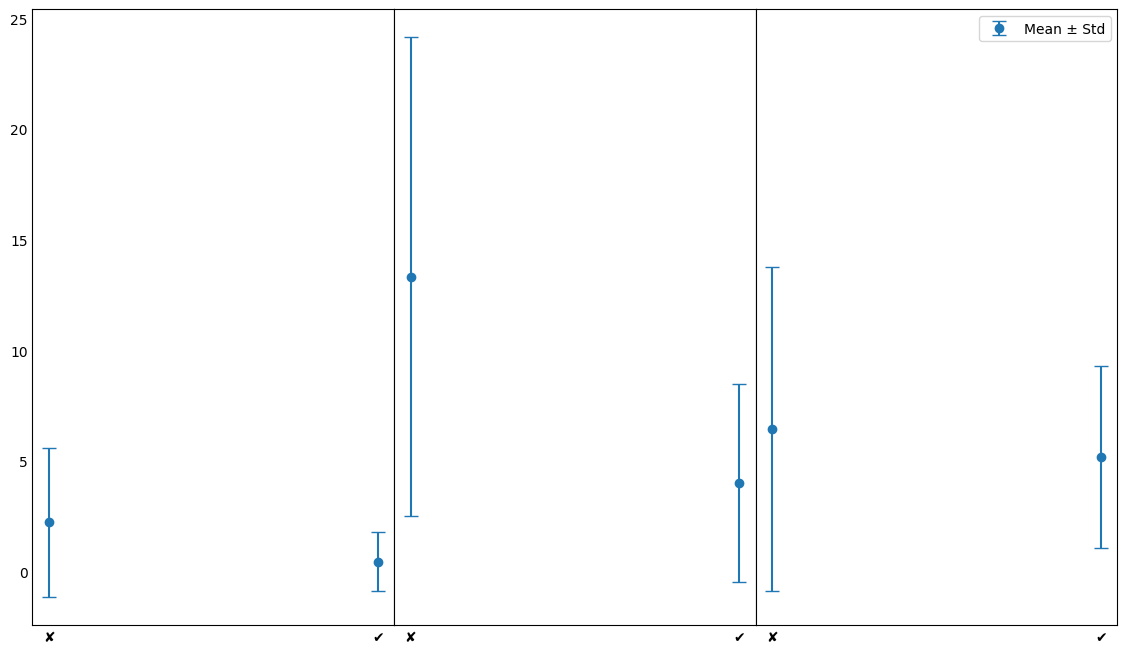

In [316]:
groups = town01_regular.groupby(["baseline"])
fig, axes = plt.subplots(1, len(groups), sharey=True, figsize=(14,8))
for ax, (index, group) in zip(axes, groups):
    # The rename_axis function makes the difference
    group=group.reset_index()
    ax.errorbar(group["Head"], group["timeout_mean"], yerr=group['timeout_std'],fmt='o', capsize=5, label='Mean ± Std')
    ax.tick_params(axis='both', which='both', length=0)
ax.legend()
fig.subplots_adjust(wspace=0)


In [262]:
town01_regular

Head        Timeout     Collisions        Success
baseline backbone                                                   
arp      unrolling    ✘    2.22 ± 3.38   10.0 ± 11.83  87.78 ± 13.28
         unrolling    ✔    0.44 ± 1.33      0.0 ± 0.0   99.56 ± 1.33
bcoh     unrolling    ✘  13.33 ± 10.82   43.11 ± 5.49  43.56 ± 12.44
         unrolling    ✔     4.0 ± 4.47  48.89 ± 13.82   47.11 ± 16.1
bcso     unrolling    ✘    6.44 ± 7.33    1.78 ± 2.73   91.78 ± 6.51
         unrolling    ✔    5.17 ± 4.12     1.0 ± 1.55   93.83 ± 3.82

In [263]:
town01_dense

Head        Timeout    Collisions        Success
baseline backbone                                                  
arp      unrolling    ✘    1.78 ± 3.07  14.0 ± 10.49   84.22 ± 12.9
         unrolling    ✔      0.0 ± 0.0   7.56 ± 6.46   92.44 ± 6.46
bcoh     unrolling    ✘  12.67 ± 14.46  46.44 ± 8.88  40.89 ± 13.82
         unrolling    ✔    4.44 ± 3.13  55.56 ± 9.68    40.0 ± 9.59
bcso     unrolling    ✘    6.44 ± 5.27    9.11 ± 5.4   84.44 ± 7.13
         unrolling    ✔    2.83 ± 2.99   4.17 ± 2.64    93.0 ± 4.65

In [264]:
town02_regular

Head      Timeout     Collisions       Success
baseline backbone                                                
arp      unrolling    ✘  2.22 ± 3.53  23.78 ± 11.94   74.0 ± 8.72
         unrolling    ✔  0.44 ± 1.33    5.78 ± 7.24  93.78 ± 7.77
bcoh     unrolling    ✘  6.67 ± 3.46    40.22 ± 5.7  53.11 ± 6.86
         unrolling    ✔  4.44 ± 4.22   34.67 ± 7.48  60.89 ± 7.69
bcso     unrolling    ✘   9.33 ± 4.9    9.78 ± 4.84  80.89 ± 8.37
         unrolling    ✔  0.67 ± 1.63    17.0 ± 5.44  82.33 ± 5.54

In [271]:
town02_dense

Head       Timeout     Collisions        Success
baseline backbone                                                  
arp      unrolling    ✘  12.89 ± 7.75  31.56 ± 15.93  55.56 ± 12.03
         unrolling    ✔   4.89 ± 5.58   19.11 ± 5.21    76.0 ± 6.32
bcoh     unrolling    ✘  12.89 ± 10.3   54.44 ± 8.17   32.67 ± 7.62
         unrolling    ✔   4.89 ± 5.93   60.44 ± 5.46    34.67 ± 4.0
bcso     unrolling    ✘  12.89 ± 6.17   28.44 ± 4.77   58.67 ± 4.58
         unrolling    ✔   11.0 ± 5.51    18.5 ± 9.12    70.5 ± 6.02

__Traffic: Regular,\
Town: Training Town__

In [266]:
groups.loc[(slice(None), "Town01", 1, "train")].reset_index(level=[6,7], drop=True)

timeout_mean  \
baseline town   traffic weather bev detectboxes backbone  datarep augment                 
arp      Town01 1       train   0   0           unrolling 1       0                2.22   
                                1   1           unrolling 1       0                0.44   
bcoh     Town01 1       train   0   0           unrolling 1       0               13.33   
                                1   1           unrolling 1       0                4.00   
bcso     Town01 1       train   0   0           unrolling 1       0                6.44   
                                                                  1                1.33   
                                                          3       0                9.33   
                                1   1           unrolling 1       0                5.17   

                                                                           timeout_std  \
baseline town   traffic weather bev detectboxes backbone  datarep augment                
arp      Town01 1       train   0   0           unrolling 1       0               3.38   
                                1   1           unrolling 1       0               1.33   
bcoh     Town01 1       train   0   0           unrolling 1       0              10.82   
                                1   1           unrolling 1       0               4.47   
bcso     Town01 1       train   0   0           unrolling 1       0               7.33   
                                                                  1               2.31   
                                                          3       0               1.15   
                                1   1           unrolling 1       0               4.12   

                                                                           collisions_mean  \
baseline town   traffic weather bev detectboxes backbone  datarep augment                    
arp      Town01 1       train   0   0           unrolling 1       0                  10.00   
                                1   1           unrolling 1       0                   0.00   
bcoh     Town01 1       train   0   0           unrolling 1       0                  43.11   
                                1   1           unrolling 1       0                  48.89   
bcso     Town01 1       train   0   0           unrolling 1       0                   1.78   
                                                                  1                  29.33   
                                                          3       0                   0.67   
                                1   1           unrolling 1       0                   1.00   

                                                                           collisions_std  \
baseline town   traffic weather bev detectboxes backbone  datarep augment                   
arp      Town01 1       train   0   0           unrolling 1       0                 11.83   
                                1   1           unrolling 1       0                  0.00   
bcoh     Town01 1       train   0   0           unrolling 1       0                  5.49   
                                1   1           unrolling 1       0                 13.82   
bcso     Town01 1       train   0   0           unrolling 1       0                  2.73   
                                                                  1                  2.31   
                                                          3       0                  1.15   
                                1   1           unrolling 1       0                  1.55   

                                                                           success_mean  \
baseline town   traffic weather bev detectboxes backbone  datarep augment                 
arp      Town01 1       train   0   0           unrolling 1       0               87.78   
                                1   1           unrolling 1       0               99.56   
bcoh     Town01 1       tra

__Traffic: Dense,\
Town: Training Town__

In [267]:
groups.loc[(slice(None), "Town01", 2, "train")].reset_index(level=[6,7], drop=True)

timeout_mean  \
baseline town   traffic weather bev detectboxes backbone  datarep augment                 
arp      Town01 2       train   0   0           unrolling 1       0                1.78   
                                1   1           unrolling 1       0                0.00   
bcoh     Town01 2       train   0   0           unrolling 1       0               12.67   
                                1   1           unrolling 1       0                4.44   
bcso     Town01 2       train   0   0           unrolling 1       0                6.44   
                                                                  1                4.00   
                                                          3       0                5.33   
                                1   1           unrolling 1       0                2.83   

                                                                           timeout_std  \
baseline town   traffic weather bev detectboxes backbone  datarep augment                
arp      Town01 2       train   0   0           unrolling 1       0               3.07   
                                1   1           unrolling 1       0               0.00   
bcoh     Town01 2       train   0   0           unrolling 1       0              14.46   
                                1   1           unrolling 1       0               3.13   
bcso     Town01 2       train   0   0           unrolling 1       0               5.27   
                                                                  1               0.00   
                                                          3       0               1.15   
                                1   1           unrolling 1       0               2.99   

                                                                           collisions_mean  \
baseline town   traffic weather bev detectboxes backbone  datarep augment                    
arp      Town01 2       train   0   0           unrolling 1       0                  14.00   
                                1   1           unrolling 1       0                   7.56   
bcoh     Town01 2       train   0   0           unrolling 1       0                  46.44   
                                1   1           unrolling 1       0                  55.56   
bcso     Town01 2       train   0   0           unrolling 1       0                   9.11   
                                                                  1                  37.33   
                                                          3       0                   5.33   
                                1   1           unrolling 1       0                   4.17   

                                                                           collisions_std  \
baseline town   traffic weather bev detectboxes backbone  datarep augment                   
arp      Town01 2       train   0   0           unrolling 1       0                 10.49   
                                1   1           unrolling 1       0                  6.46   
bcoh     Town01 2       train   0   0           unrolling 1       0                  8.88   
                                1   1           unrolling 1       0                  9.68   
bcso     Town01 2       train   0   0           unrolling 1       0                  5.40   
                                                                  1                  6.11   
                                                          3       0                  3.06   
                                1   1           unrolling 1       0                  2.64   

                                                                           success_mean  \
baseline town   traffic weather bev detectboxes backbone  datarep augment                 
arp      Town01 2       train   0   0           unrolling 1       0               84.22   
                                1   1           unrolling 1       0               92.44   
bcoh     Town01 2       tra

__Traffic: Regular,\
Town: Test Town__

In [268]:
groups.loc[(slice(None), "Town02", 1, "train")].reset_index(level=[6,7], drop=True)

timeout_mean  \
baseline town   traffic weather bev detectboxes backbone  datarep augment                 
arp      Town02 1       train   0   0           unrolling 1       0                2.22   
                                1   1           unrolling 1       0                0.44   
bcoh     Town02 1       train   0   0           unrolling 1       0                6.67   
                                1   1           unrolling 1       0                4.44   
bcso     Town02 1       train   0   0           unrolling 1       0                9.33   
                                                                  1                4.00   
                                                          3       0               13.33   
                                1   1           unrolling 1       0                0.67   

                                                                           timeout_std  \
baseline town   traffic weather bev detectboxes backbone  datarep augment                
arp      Town02 1       train   0   0           unrolling 1       0               3.53   
                                1   1           unrolling 1       0               1.33   
bcoh     Town02 1       train   0   0           unrolling 1       0               3.46   
                                1   1           unrolling 1       0               4.22   
bcso     Town02 1       train   0   0           unrolling 1       0               4.90   
                                                                  1               4.00   
                                                          3       0               1.15   
                                1   1           unrolling 1       0               1.63   

                                                                           collisions_mean  \
baseline town   traffic weather bev detectboxes backbone  datarep augment                    
arp      Town02 1       train   0   0           unrolling 1       0                  23.78   
                                1   1           unrolling 1       0                   5.78   
bcoh     Town02 1       train   0   0           unrolling 1       0                  40.22   
                                1   1           unrolling 1       0                  34.67   
bcso     Town02 1       train   0   0           unrolling 1       0                   9.78   
                                                                  1                  41.33   
                                                          3       0                  32.00   
                                1   1           unrolling 1       0                  17.00   

                                                                           collisions_std  \
baseline town   traffic weather bev detectboxes backbone  datarep augment                   
arp      Town02 1       train   0   0           unrolling 1       0                 11.94   
                                1   1           unrolling 1       0                  7.24   
bcoh     Town02 1       train   0   0           unrolling 1       0                  5.70   
                                1   1           unrolling 1       0                  7.48   
bcso     Town02 1       train   0   0           unrolling 1       0                  4.84   
                                                                  1                  2.31   
                                                          3       0                  5.29   
                                1   1           unrolling 1       0                  5.44   

                                                                           success_mean  \
baseline town   traffic weather bev detectboxes backbone  datarep augment                 
arp      Town02 1       train   0   0           unrolling 1       0               74.00   
                                1   1           unrolling 1       0               93.78   
bcoh     Town02 1       tra

__Traffic: Dense,\
Town: Test Town__

In [269]:
test_dense=groups.loc[(slice(None), "Town02", 2, "train")].reset_index(level=[6,7], drop=True)

In [270]:
pretify_table(test_dense)

KeyError: 'Level speed not found'

In [ ]:
#groups.to_csv(os.path.join("/home/maximilian/Master/first_large_evaluation_all_settings_all_baselines_partially_wrong_speed_input", os.path.join("/home/maximilian/Master/first_large_evaluation_all_settings_all_baselines_partially_wrong_speed_input","combined.csv")))